### Fake News Classifier

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [53]:
dataset=pd.read_csv("C:\\Users\\Dell\\Downloads\\fake_and_real_news.csv")
dataset.head()

,Text,label
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake
1,U.S. conservative leader optimistic of common ...,Real
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real
3,Court Forces Ohio To Allow Millions Of Illega...,Fake
4,Democrats say Trump agrees to work on immigrat...,Real


In [54]:
df=pd.DataFrame(dataset)
df.head()

,Text,label
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake
1,U.S. conservative leader optimistic of common ...,Real
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real
3,Court Forces Ohio To Allow Millions Of Illega...,Fake
4,Democrats say Trump agrees to work on immigrat...,Real


In [55]:
df.shape

(9900, 2)

In [56]:
mapp={"Fake":0,"Real":1}
df["label"]=df["label"].map(mapp)

In [57]:
df.head()

,Text,label
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,0
1,U.S. conservative leader optimistic of common ...,1
2,"Trump proposes U.S. tax overhaul, stirs concer...",1
3,Court Forces Ohio To Allow Millions Of Illega...,0
4,Democrats say Trump agrees to work on immigrat...,1


In [58]:
import nltk

In [59]:
nltk.download("stopword")
nltk.download("punkt")
nltk.download("wordnet")
nltk.download("omw-1.4")

[nltk_data] Error loading stopword: Package 'stopword' not found in
[nltk_data]     index
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [60]:
from nltk.corpus import stopwords
stopword=stopwords.words("english")
print(stopword)

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

In [61]:
from nltk.stem import WordNetLemmatizer
lam=WordNetLemmatizer()

In [62]:
from nltk.tokenize import word_tokenize

In [63]:
import string
import re
def clean_word(text):
    text=text.lower()
    text=text.translate(str.maketrans("","",string.punctuation))
    text=re.sub(r'[^a-zA-Z]'," ",text)
    words=word_tokenize(text)
    clean_words=[lam.lemmatize(word) for word in words if word not in stopword and len(word)>2]
    return clean_words
    

In [64]:
df["clean_text"]=df["Text"].apply(clean_word)

In [65]:
df.head()

,Text,label,clean_text
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,0,"[top, trump, surrogate, brutally, stab, back, ..."
1,U.S. conservative leader optimistic of common ...,1,"[conservative, leader, optimistic, common, gro..."
2,"Trump proposes U.S. tax overhaul, stirs concer...",1,"[trump, proposes, tax, overhaul, stir, concern..."
3,Court Forces Ohio To Allow Millions Of Illega...,0,"[court, force, ohio, allow, million, illegally..."
4,Democrats say Trump agrees to work on immigrat...,1,"[democrat, say, trump, agrees, work, immigrati..."


In [66]:
y=df.loc[:,["label"]]

In [67]:
import gensim

In [68]:
from gensim.models import Word2Vec
model=Word2Vec(sentences=df["clean_text"],vector_size=100,window=5,min_count=1,sg=0)
vector=model.wv["budget"]

similar=model.wv.most_similar("budget",topn=5)
print(similar)

[('fiscal', 0.7968180775642395), ('spending', 0.7771315574645996), ('proposed', 0.7599621415138245), ('approve', 0.7274041771888733), ('impasse', 0.7270067930221558)]


In [69]:
max_len=100
def sentence_vector(text,model,max_len):
    vecs=[]
    for word in text:
        if word in model.wv:
            vecs.append(model.wv[word])
        else:
            vecs.append(np.zeros(model.vector_size))
            
    if len(vecs)<max_len:
        pad_len=max_len-len(vecs)
        vecs+=[np.zeros(model.vector_size)]*pad_len
        
    vecs=vecs[:max_len]
    return np.array(vecs)

In [70]:
df["vector"]=df["clean_text"].apply(lambda x:sentence_vector(x,model,max_len))

In [71]:
df["vector"][0].shape

(100, 100)

In [72]:
lst=df["vector"].tolist
print(lst)

<bound method IndexOpsMixin.tolist of 0       [[-0.20658916, -0.67699033, 1.3039216, -0.0593...
1       [[0.26150035858154297, 0.07814445346593857, -1...
2       [[-0.030072467, 1.4597186, 2.049864, 1.8078865...
3       [[-1.8556974, 1.9440683, -1.5411154, 1.6765734...
4       [[0.9221404, -0.6171556, -2.5387487, 0.7376357...
                              ...                        
9895    [[0.8710336, 0.33859527, 0.8477328, -0.2084354...
9896    [[-0.030072467, 1.4597186, 2.049864, 1.8078865...
9897    [[-0.030072467, 1.4597186, 2.049864, 1.8078865...
9898    [[2.6133335, -0.34863937, 0.10743643, -0.13927...
9899    [[2.246311, -0.3180864, -0.8625949, 0.96317166...
Name: vector, Length: 9900, dtype: object>


In [73]:
X=np.stack(df["vector"].tolist())
print(X.shape)

(9900, 100, 100)


In [74]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [75]:
! pip install tensorflow

In [76]:
import keras

In [77]:
from tensorflow.keras.models import Sequential #type:ignore
from tensorflow.keras.layers import SimpleRNN,Dense #type:ignore


#### Simple RNN

In [78]:
import warnings
warnings.filterwarnings("ignore")
classify=Sequential()
classify.add(SimpleRNN(64,input_shape=(100,100)))
classify.add(Dense(1,activation="sigmoid"))

classify.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_1 (SimpleRNN)        │ (None, 64)             │        10,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,625 (41.50 KB)

 Trainable params: 10,625 (41.50 KB)

 Non-trainable params: 0 (0.00 B)

In [79]:
classify.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [80]:
from keras.callbacks import EarlyStopping
er=EarlyStopping(monitor="val_loss",patience=5,restore_best_weights=True)
model=classify.fit(x_train,y_train,validation_data=(x_test,y_test),batch_size=32,epochs=100,callbacks=[er])

Epoch 1/100
248/248 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - accuracy: 0.7236 - loss: 0.5524 - val_accuracy: 0.8066 - val_loss: 0.4062
Epoch 2/100
248/248 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.8282 - loss: 0.3931 - val_accuracy: 0.8758 - val_loss: 0.3275
Epoch 3/100
248/248 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.8538 - loss: 0.3644 - val_accuracy: 0.7848 - val_loss: 0.4464
Epoch 4/100
248/248 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.8029 - loss: 0.4176 - val_accuracy: 0.8556 - val_loss: 0.3471
Epoch 5/100
248/248 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.8302 - loss: 0.4089 - val_accuracy: 0.7162 - val_loss: 0.5997
Epoch 6/100
248/248 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.7879 - loss: 0.4561 - val_accuracy: 0.8566 - val_loss: 0.3469
Epoch 7/100
248/248 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.8584 - loss: 0.3706 - val_accuracy: 0.8616 - val_loss: 0.4063


In [81]:
print(model.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


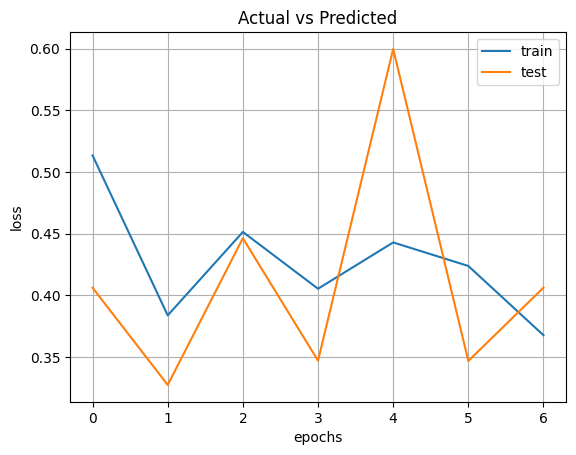

In [82]:
plt.plot(model.history["loss"],label="train")
plt.plot(model.history["val_loss"],label="test")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("Actual vs Predicted")
plt.legend()
plt.grid(True)
plt.show()


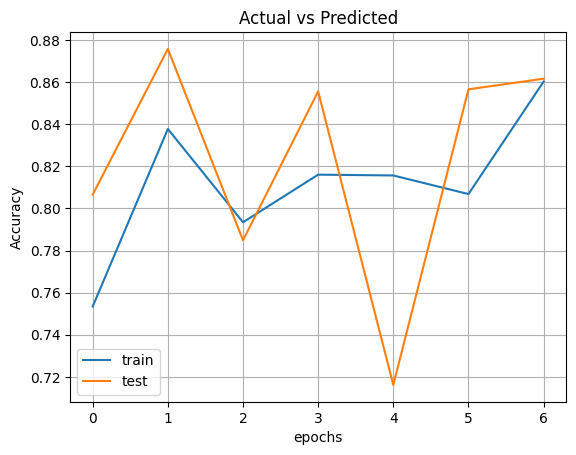

In [83]:
plt.plot(model.history["accuracy"],label="train")
plt.plot(model.history["val_accuracy"],label="test")
plt.xlabel("epochs")
plt.ylabel("Accuracy")
plt.title("Actual vs Predicted")
plt.legend()
plt.grid(True)
plt.show()

In [84]:
y_pred_test=classify.predict(x_test)
y_pred_test_real=(y_pred_test>0.5).astype(int)

62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [85]:
y_pred_train=classify.predict(x_train)
y_pred_train_real=(y_pred_train>0.5).astype(int)

248/248 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


In [86]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred_test_real))
print(accuracy_score(y_train,y_pred_train_real))

0.8757575757575757
0.8799242424242424


In [87]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_test_real))

              precision    recall  f1-score   support

           0       0.93      0.81      0.87       973
           1       0.84      0.94      0.88      1007

    accuracy                           0.88      1980
   macro avg       0.88      0.87      0.87      1980
weighted avg       0.88      0.88      0.88      1980



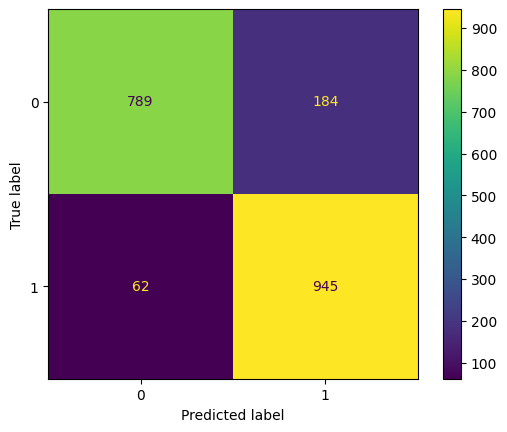

In [88]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm=confusion_matrix(y_test,y_pred_test_real)
ConfusionMatrixDisplay(cm).plot()
plt.show()

62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


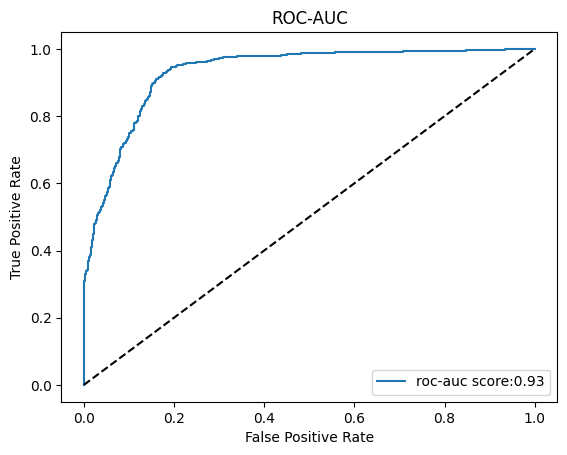

In [89]:
from sklearn.metrics import roc_auc_score,roc_curve
y_pred_prob=classify.predict(x_test)

fpr,tpr,thresold=roc_curve(y_test,y_pred_prob)
plt.plot(fpr,tpr,label=f"roc-auc score:{round(roc_auc_score(y_test,y_pred_prob),2)}")
plt.plot([0,1],[0,1],linestyle="dashed",color="black")
plt.title("ROC-AUC")
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

#### Bidirectional RNN

In [90]:
from tensorflow.keras.layers import Bidirectional,SimpleRNN,Dense,Dropout #type:ignore


In [91]:
import warnings
warnings.filterwarnings("ignore")
classif_1=Sequential()

classif_1.add(Bidirectional(SimpleRNN(64,return_sequences=False,input_shape=(100,100))))
classif_1.add(Dropout(0.5))
classif_1.add(Dense(units=1,activation="sigmoid"))

In [92]:
classif_1.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [93]:
from keras.callbacks import EarlyStopping
er=EarlyStopping(monitor="val_loss",patience=5,restore_best_weights=True)
model1=classif_1.fit(x_train,y_train,validation_data=(x_test,y_test),batch_size=32,epochs=50,callbacks=[er])

Epoch 1/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 0.7472 - loss: 0.4888 - val_accuracy: 0.9874 - val_loss: 0.0543
Epoch 2/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - accuracy: 0.9901 - loss: 0.0486 - val_accuracy: 0.9879 - val_loss: 0.0626
Epoch 3/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - accuracy: 0.9926 - loss: 0.0440 - val_accuracy: 0.9975 - val_loss: 0.0133
Epoch 4/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - accuracy: 0.9971 - loss: 0.0229 - val_accuracy: 0.9985 - val_loss: 0.0110
Epoch 5/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.9979 - loss: 0.0122 - val_accuracy: 0.9980 - val_loss: 0.0093
Epoch 6/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.9971 - loss: 0.0166 - val_accuracy: 0.9995 - val_loss: 0.0044
Epoch 7/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - accuracy: 0.9967 - loss: 0.0160 - val_accuracy: 0.9990 - val_loss: 0.0054
Epoch 8/50
248/248 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - accuracy: 0.9990 - loss: 0.0064 - val_acc

In [94]:
print(model1.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


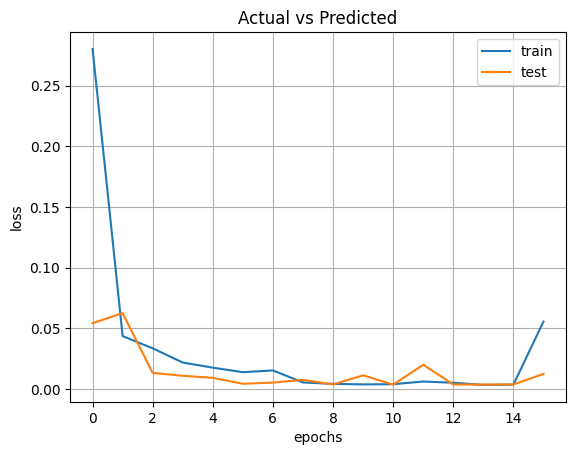

In [113]:
plt.plot(model1.history["loss"],label="train")
plt.plot(model1.history["val_loss"],label="test")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("Actual vs Predicted")
plt.legend()
plt.grid(True)
plt.show()

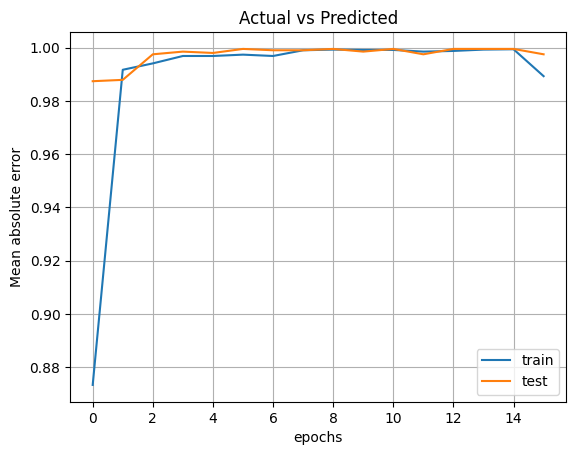

In [114]:
plt.plot(model1.history["accuracy"],label="train")
plt.plot(model1.history["val_accuracy"],label="test")
plt.xlabel("epochs")
plt.ylabel("Mean absolute error")
plt.title("Actual vs Predicted")
plt.legend()
plt.grid(True)
plt.show()

In [97]:
y_pred_prob_test_bi_rnn=classif_1.predict(x_test)
y_pred_prob_test_bi_rnn_real=(y_pred_prob_test_bi_rnn>0.5).astype(int)

62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


In [98]:
y_pred_prob_train_bi_rnn=classif_1.predict(x_train)
y_pred_prob_train_bi_rnn_real=(y_pred_prob_train_bi_rnn>0.5).astype(int)

248/248 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


In [99]:
print(accuracy_score(y_test,y_pred_prob_test_bi_rnn_real))
print(accuracy_score(y_train,y_pred_prob_train_bi_rnn_real))

0.9994949494949495
0.9992424242424243


In [100]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_prob_test_bi_rnn_real))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       973
           1       1.00      1.00      1.00      1007

    accuracy                           1.00      1980
   macro avg       1.00      1.00      1.00      1980
weighted avg       1.00      1.00      1.00      1980



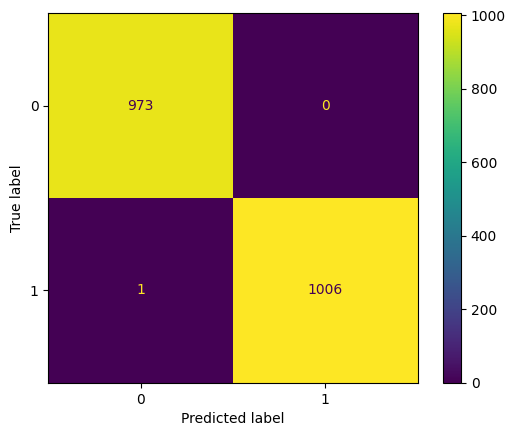

In [101]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm=confusion_matrix(y_test,y_pred_prob_test_bi_rnn_real)
ConfusionMatrixDisplay(cm).plot()
plt.show()

62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


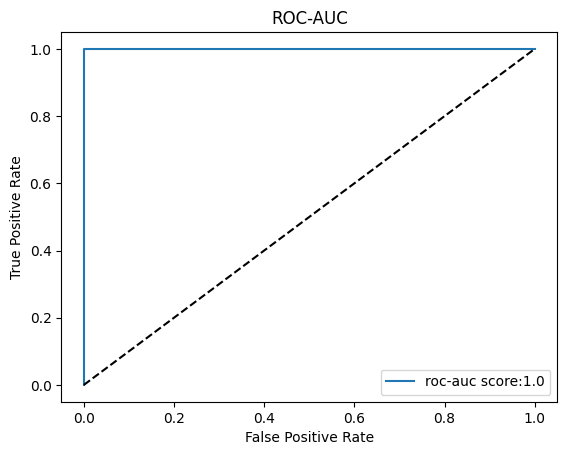

In [102]:
from sklearn.metrics import roc_auc_score,roc_curve
y_pred_prob=classif_1.predict(x_test)

fpr,tpr,thresold=roc_curve(y_test,y_pred_prob)
plt.plot(fpr,tpr,label=f"roc-auc score:{round(roc_auc_score(y_test,y_pred_prob),2)}")
plt.plot([0,1],[0,1],linestyle="dashed",color="black")
plt.title("ROC-AUC")
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [103]:
from sklearn.metrics import precision_score
Precision_score=pd.DataFrame({"SimpleRNN":precision_score(y_test,y_pred_test_real),
                         "BidirectionalRNN":precision_score(y_test,y_pred_prob_test_bi_rnn_real)},index=["Precision Score"])
Precision_df=Precision_score.T.reset_index()
Precision_df

,index,Precision Score
0,SimpleRNN,0.837024
1,BidirectionalRNN,1.000000


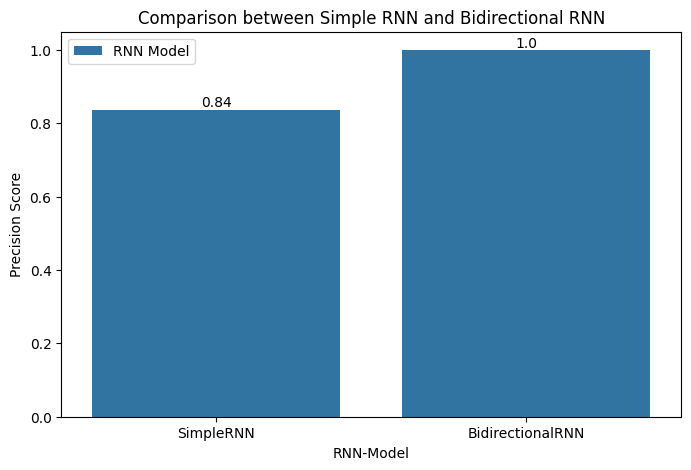

In [104]:
import seaborn as sns
plt.figure(figsize=(8,5))
bar=sns.barplot(x="index",y="Precision Score",data=Precision_df,label="RNN Model")
for i in bar.patches:
    height=i.get_height()
    plt.text(i.get_x()+i.get_width()/2,height,f"{round(height,2)}",ha="center",va="bottom")

plt.xlabel("RNN-Model")
plt.title("Comparison between Simple RNN and Bidirectional RNN")
plt.show()

In [105]:
from sklearn.metrics import accuracy_score
Accuracy_score=pd.DataFrame({"SimpleRNN":accuracy_score(y_test,y_pred_test_real),
                         "BidirectionalRNN":accuracy_score(y_test,y_pred_prob_test_bi_rnn_real)},index=["Accuracy Score"])
accuracy_df=Accuracy_score.T.reset_index()
accuracy_df

,index,Accuracy Score
0,SimpleRNN,0.875758
1,BidirectionalRNN,0.999495


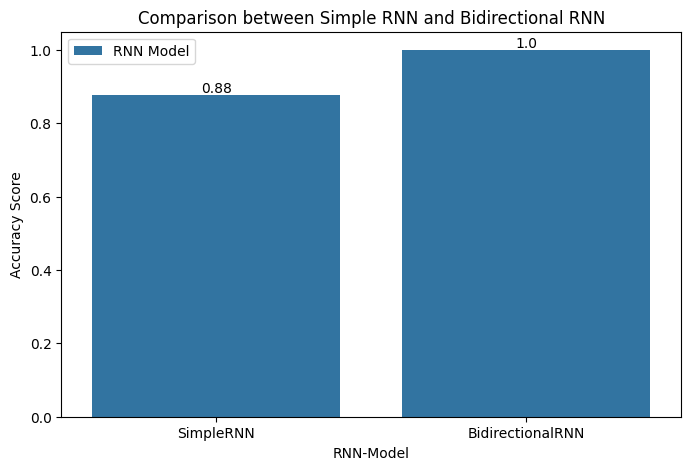

In [106]:
import seaborn as sns
plt.figure(figsize=(8,5))
bar=sns.barplot(x="index",y="Accuracy Score",data=accuracy_df,label="RNN Model")
for i in bar.patches:
    height=i.get_height()
    plt.text(i.get_x()+i.get_width()/2,height,f"{round(height,2)}",ha="center",va="bottom")

plt.xlabel("RNN-Model")
plt.title("Comparison between Simple RNN and Bidirectional RNN")
plt.show()

In [107]:
from sklearn.metrics import recall_score
Recall_score=pd.DataFrame({"SimpleRNN":recall_score(y_test,y_pred_test_real),
                         "BidirectionalRNN":recall_score(y_test,y_pred_prob_test_bi_rnn_real)},index=["Recall Score"])
recall_df=Recall_score.T.reset_index()
recall_df

,index,Recall Score
0,SimpleRNN,0.938431
1,BidirectionalRNN,0.999007


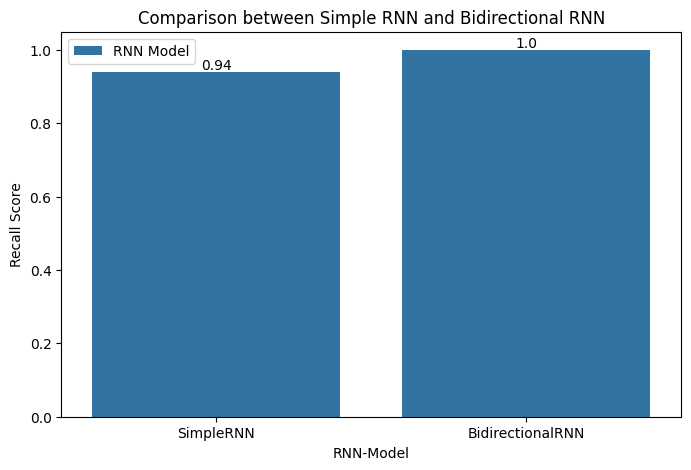

In [108]:
import seaborn as sns
plt.figure(figsize=(8,5))
bar=sns.barplot(x="index",y="Recall Score",data=recall_df,label="RNN Model")
for i in bar.patches:
    height=i.get_height()
    plt.text(i.get_x()+i.get_width()/2,height,f"{round(height,2)}",ha="center",va="bottom")

plt.xlabel("RNN-Model")
plt.title("Comparison between Simple RNN and Bidirectional RNN")
plt.show()

In [109]:
from sklearn.metrics import f1_score
F1_score=pd.DataFrame({"SimpleRNN":f1_score(y_test,y_pred_test_real),
                         "BidirectionalRNN":f1_score(y_test,y_pred_prob_test_bi_rnn_real)},index=["f1-Score"])
f1_df=F1_score.T.reset_index()
f1_df

,index,f1-Score
0,SimpleRNN,0.884831
1,BidirectionalRNN,0.999503


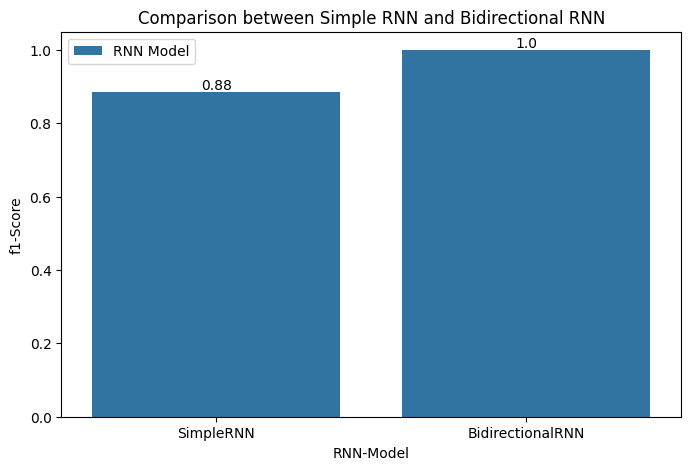

In [112]:
import seaborn as sns
plt.figure(figsize=(8,5))
bar=sns.barplot(x="index",y="f1-Score",data=f1_df,label="RNN Model")
for i in bar.patches:
    height=i.get_height()
    plt.text(i.get_x()+i.get_width()/2,height,f"{round(height,2)}",ha="center",va="bottom")

plt.xlabel("RNN-Model")
plt.title("Comparison between Simple RNN and Bidirectional RNN")
plt.show()

### Bidiretional RNN works better 